In [1]:
import networkx as nx
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
# Genes significativos para PatuT inferidos en el análisis de MAGeCKFlute:
PatuT = ['PRMT3', 'ASXL1', 'HELLS', 'SMARCE1', 'KDM4B', 'EPC2', 'WHSC1', 'SUV39H2']
# Genes significativos para PatuS inferidos en el análisis de MAGeCKFlute:
PatuS = ['BRD4', 'CHD7', 'ING5', 'PHF23', 'UBE2A']

# Mutaciones somáticas deletéreas exclusivas de PatuT.
PatuTMut = ['ZNF622', 'ZNF132', 'PODNL1', 'IQGAP2', 'C2CD4A', 'GJB2', 'CYP1A2', 'LRP2', 'CHD5', 'TMPRSS5', 'SLC15A5', 'NLRP3', 'OR2H1', 'PRKCZ']
# Mutaciones somáticas deletéreas exclusivas de PatuS.
PatuSMut = ['NRTN', 'CDH9', 'TYRO3', 'CHEK1', 'TNS4', 'GAB2', 'RNF223']

In [3]:
# Directorios para las parejas de SL obtenidas mediante SL_finder.ipynb, computacionalmente y experimentalmente respectivamente. Cambiar si fuese necesario.
CompWd = '/Directorio/Candidate_SL_Pairs/Computacional/'
LitWd = '/Directorio/Candidate_SL_Pairs/Experimental/'

In [4]:
# Lectura de los datos de parejas de SL para cada dataset utilizado.
# Experimentales/Bibliográficos:
BioGrid = pd.read_csv(f'{LitWd}BioGrid_SLPairs.csv', header = 0)
GenomeRNAi = pd.read_csv(f'{LitWd}GenomeRNAi_SLPairs.csv', header = 0)
GoldStandard = pd.read_csv(f'{LitWd}Gold_Standard_SLPairs.csv', header = 0)
SlorthExp = pd.read_csv(f'{LitWd}SlorthExp_SLPairs.csv', header = 0)
SynLethDBExp = pd.read_csv(f'{LitWd}SynLethDB_Exp_SLPairs.csv', header = 0)
# Computacionales:
DAISY = pd.read_csv(f'{CompWd}DAISY_SLPairs.csv', header = 0)
SlorthComp = pd.read_csv(f'{CompWd}SlorthComp_SLPairs.csv', header = 0)
SynLethDBComp = pd.read_csv(f'{CompWd}SynLethDB_Comp_SLPairs.csv', header = 0)

# Almacenamiento de los datos en variables Experimental y Computacional.
ExpDBs = [BioGrid, GenomeRNAi, GoldStandard, SlorthExp, SynLethDBExp]
CompDBs = [DAISY, SlorthComp, SynLethDBComp]

In [5]:
# Obtención de las parejas de SL experimentales de cada gen significativo a lo largo de todos los datasets:
ExpDB = pd.concat(ExpDBs, axis=0).reset_index(drop = True)
ExpSLs = {}

for gene in ExpDB.columns:
    ExpSLs[gene] = set(filter(lambda x: pd.notna(x), ExpDB[gene].dropna()))

print(ExpSLs)

{'SUV39H2': {'KRAS', 'NRAS', 'Ras', 'HRAS'}, 'BRD4': {'MSH6', 'BRCA1', 'MAP2K1', 'c-Myc after tamoxifen stimulation', 'KDM5C', 'NAE1', 'CHEK1', 'RB1', 'KMT2D', 'MYC', 'CDK9', 'WEE1', 'PARP1', 'CDC7', 'FGFR3', 'MLN4924 (a NAE inhibitor)', 'DHFR', 'PTEN', 'PTAR1', 'CHEK2'}, 'ING5': {'TUBA1A', 'CDC7', 'CDK9', 'MAP2K1'}, 'CHD7': {'KRAS', 'NRAS', 'Ras', 'HRAS'}, 'UBE2A': {'NAE1', 'MLN4924 (a NAE inhibitor)', 'cisplatin'}, 'ASXL1': {'MUS81'}}


In [6]:
# Filtrado de las parejas en PatuT y PatuS.
ExpPatuTSLs = {key: ExpSLs[key] for key in PatuT if key in ExpSLs} 
ExpPatuSSLs = {key: ExpSLs[key] for key in PatuS if key in ExpSLs} 

print(ExpPatuTSLs)
print(ExpPatuSSLs)

{'ASXL1': {'MUS81'}, 'SUV39H2': {'KRAS', 'NRAS', 'Ras', 'HRAS'}}
{'BRD4': {'MSH6', 'BRCA1', 'MAP2K1', 'c-Myc after tamoxifen stimulation', 'KDM5C', 'NAE1', 'CHEK1', 'RB1', 'KMT2D', 'MYC', 'CDK9', 'WEE1', 'PARP1', 'CDC7', 'FGFR3', 'MLN4924 (a NAE inhibitor)', 'DHFR', 'PTEN', 'PTAR1', 'CHEK2'}, 'CHD7': {'KRAS', 'NRAS', 'Ras', 'HRAS'}, 'ING5': {'TUBA1A', 'CDC7', 'CDK9', 'MAP2K1'}, 'UBE2A': {'NAE1', 'MLN4924 (a NAE inhibitor)', 'cisplatin'}}


In [7]:
# Búsqueda de las parejas entre los genes mutados de forma exclusiva en PatuT y en PatuS.
ExpPatuT_SLgenes = set(gene for genes_set in ExpPatuTSLs.values() for gene in genes_set)
ExpPatuS_SLgenes = set(gene for genes_set in ExpPatuSSLs.values() for gene in genes_set)

Common_ExpGenes_T = ExpPatuT_SLgenes.intersection(PatuTMut)
Common_ExpGenes_S = ExpPatuS_SLgenes.intersection(PatuSMut)

if Common_ExpGenes_T:
    print(f"SL genes found as somatic mutations in PatuT Experimental Literature:")
    for key, genes_set in ExpPatuTSLs.items():
        for gene in genes_set:
            if gene in Common_ExpGenes_T:
                print(f"   Key: {key}, Gene: {gene}")

if Common_ExpGenes_S:
    print(f"SL genes found as somatic mutations in PatuS Experimental Literature:")
    for key, genes_set in ExpPatuSSLs.items():
        for gene in genes_set:
            if gene in Common_ExpGenes_S:
                print(f"   SL pair: {gene}, of: {key} ")

SL genes found as somatic mutations in PatuS Experimental Literature:
   SL pair: CHEK1, of: BRD4 


In [8]:
CompDB = pd.concat(CompDBs, axis=0).reset_index(drop = True)
CompSLs = {}

for gene in CompDB.columns:
    CompSLs[gene] = set(filter(lambda x: pd.notna(x), CompDB[gene].dropna()))

print(CompSLs)

{'HELLS': {'TSG101', 'ACTB', 'TNFAIP3', 'TNK2', 'AURKA', 'NFE2L2', 'IKBKB', 'UBE2K', 'PSEN1', 'APEX1', 'HIPK2', 'SFPQ', 'SMARCE1', 'ZNF107', 'RPS6KA1', 'TOPBP1', 'HSPA5', 'FEN1', 'PCNA', 'KDM1A', 'AHR', 'MAP3K1', 'HSPA8', 'CSNK1A1', 'RFC2', 'PRKACA', 'SUPT16H', 'HSPB1'}, 'KDM4B': {'POGZ', 'IDE', 'BCLAF1', 'KRAS', 'MED16', 'SIAH2', 'CASP7', 'SMARCC2', 'DAZAP1'}, 'WHSC1': {'EZH2', 'TCF3', 'HDAC9', 'CDCA3', 'PRDM1', 'KDM1A', 'PRKACA', 'FGFR2'}, 'SUV39H2': {'RAD51', 'ANKRD16', 'GTPBP4', 'ATP5F1C', 'RBM17', 'KIF11', 'ZWINT'}, 'BRD4': {'CCNT1', 'PABPC1', 'NEDD4L', 'ACTL6A', 'CUL2', 'CFTR', 'BCL6', 'TSC2', 'GSK3B', 'ABL1', 'AURKB', 'BCL3', 'TNK2', 'UBQLN1', 'RARA', 'TRIM28', 'PIAS2', 'EFTUD2', 'YBX1', 'CDC45', 'PDGFRB', 'TOP2A', 'SMARCB1', 'MYOD1', 'TP53', 'EIF4A3', 'BIRC2', 'SMARCE1', 'RPS6KA1', 'MYD88', 'HSP90AB1', 'PPARG', 'CCNB1', 'CDKN1B', 'MSH2', 'KDM1A', 'HNRNPD', 'PML', 'PRKCSH', 'ITCH', 'PTBP1', 'U2AF2', 'ORC1', 'TPR', 'FKBP1A', 'CUL4A', 'BMI1', 'EIF4G1', 'CBL', 'RBBP7', 'HSPB1', 'NC

In [9]:
CompPatuTSLs = {key: CompSLs[key] for key in PatuT if key in CompSLs} 
CompPatuSSLs = {key: CompSLs[key] for key in PatuS if key in CompSLs} 

print(CompPatuTSLs)
print(CompPatuSSLs)

{'PRMT3': {'DCTN1', 'PDLIM7'}, 'ASXL1': {'POU2F1', 'CHD4', 'TSG101', 'ACTB', 'POLD1', 'POLA1', 'CANX', 'EZR', 'BRCA1', 'SKI', 'E2F1', 'SIN3B', 'NFE2L2', 'RHOA', 'SIRT1', 'JUNB', 'UBE2K', 'SMAD4', 'RBL2', 'PRKCB', 'PHB', 'HIPK2', 'SFPQ', 'JUND', 'HSPA5', 'RAC1', 'MTA2', 'CDH1', 'PDCD6IP', 'MAPK14', 'KDM1A', 'ASF1B', 'HNRNPA2B1', 'BMI1', 'TXN', 'KEAP1', 'HSPB1'}, 'HELLS': {'TSG101', 'ACTB', 'TNFAIP3', 'TNK2', 'AURKA', 'NFE2L2', 'IKBKB', 'UBE2K', 'PSEN1', 'APEX1', 'HIPK2', 'SFPQ', 'SMARCE1', 'ZNF107', 'RPS6KA1', 'TOPBP1', 'HSPA5', 'FEN1', 'PCNA', 'KDM1A', 'AHR', 'MAP3K1', 'HSPA8', 'CSNK1A1', 'RFC2', 'PRKACA', 'SUPT16H', 'HSPB1'}, 'SMARCE1': {'PSMC4', 'UBE2S', 'BRCA1', 'WWOX', 'SEC13', 'EIF3C', 'PAPOLA', 'PSMC1', 'PIK3R2', 'HDAC7', 'LATS2', 'RAB7A', 'AURKB', 'DTL', 'CHD3', 'BUB1B', 'SMG1', 'PDLIM7', 'MET', 'ATP5O', 'CDK6', 'EPOR', 'EFTUD2', 'CDC45', 'CHUK', 'THRB', 'HIST1H3J', 'PDGFRB', 'EXOSC10', 'GNL3', 'PEX5', 'EIF4A3', 'NUP93', 'RPS6KA1', 'ERCC3', 'PPP2R1A', 'MYD88', 'HSPA5', 'CSNK1D',

In [10]:
CompPatuT_SLgenes = set(gene for genes_set in CompPatuTSLs.values() for gene in genes_set)
CompPatuS_SLgenes = set(gene for genes_set in CompPatuSSLs.values() for gene in genes_set)

Common_CompGenes_T = CompPatuT_SLgenes.intersection(PatuTMut)
Common_CompGenes_S = CompPatuS_SLgenes.intersection(PatuSMut)

if Common_CompGenes_T:
    print(f"SL genes found as somatic mutations in PatuT Computational Predictors:")
    for key, genes_set in CompPatuTSLs.items():
        for gene in genes_set:
            if gene in Common_CompGenes_T:
                print(f"   Key: {key}, Gene: {gene}")

if Common_CompGenes_S:
    print(f"SL genes found as somatic mutations in PatuS Computational Predictors:")
    for key, genes_set in CompPatuSSLs.items():
        for gene in genes_set:
            if gene in Common_CompGenes_S:
                print(f"   SL pair: {gene}, of: {key} ")

SL genes found as somatic mutations in PatuS Computational Predictors:
   SL pair: CHEK1, of: ING5 
   SL pair: CHEK1, of: UBE2A 
   SL pair: GAB2, of: UBE2A 


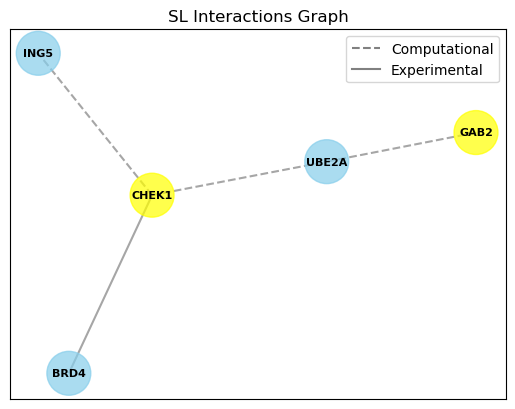

In [11]:
# Generación de una red de interacciones de SL a partir de las parejas de interés encontradas.

from matplotlib.lines import Line2D

genes = ['CHEK1', 'BRD4', 'ING5', 'GAB2', 'UBE2A']
connections = [('CHEK1', 'BRD4'), ('CHEK1', 'ING5'), ('GAB2', 'UBE2A'), ('CHEK1', 'UBE2A')]

G = nx.Graph()

G.add_nodes_from(genes)
G.add_edges_from(connections)

node_colors = ['yellow' if node == 'CHEK1' else 'yellow' if node == 'GAB2' else 'skyblue' for node in G.nodes]

edge_styles = [('CHEK1', 'BRD4')]
edges = G.edges()

pos = nx.spring_layout(G)  

for edge in edges:
    style = 'dashed' if edge not in edge_styles else 'solid'

    nx.draw_networkx_edges(G, pos, edgelist=[edge], edge_color='gray', style=style, width=1.5, alpha=0.7)

nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1000, alpha=0.7)
nx.draw_networkx_labels(G, pos, font_color='black', font_size=8, font_weight='bold')

legend_elements = [Line2D([0], [0], linestyle='dashed', color='gray', label='Computational'),
                   Line2D([0], [0], linestyle='solid', color='gray', label='Experimental')]

plt.title('SL Interactions Graph')
plt.legend(handles=legend_elements)

plt.savefig('SL_Interactions_Map.png', format='png')
plt.show()
